<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_classifica%C3%A7%C3%A3o_regres%C3%A3o_testes_algoritimos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('/content/insurance_data.csv')

In [3]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [4]:
data.tail()

,age,bought_insurance
22,40,1
23,45,1
24,50,1
25,54,1
26,23,0


In [5]:
data.shape

(27, 2)

In [6]:
data.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

In [9]:
np.unique(data['bought_insurance'], return_counts=True)

(array([0, 1]), array([13, 14]))

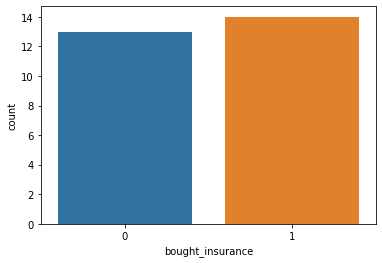

In [8]:
sns.countplot( x = data['bought_insurance']);

In [11]:
x = data.iloc[:,0].values
y = data.iloc[:,1].values

In [12]:
x.shape

(27,)

In [13]:
x = x.reshape(-1,1)

In [14]:
x.shape

(27, 1)

In [15]:
y.shape

(27,)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [18]:
x_train.shape

(20, 1)

In [19]:
y_train.shape

(20,)

In [20]:
x_test.shape

(7, 1)

In [21]:
y_test.shape

(7,)

**algoritimos para classificação**

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb = GaussianNB()

In [24]:
nb.fit(x_train, y_train)

GaussianNB()

In [25]:
previsao = nb.predict(x_test)

In [26]:
previsao

array([1, 1, 1, 1, 1, 0, 1])

In [27]:
y_test

array([1, 1, 1, 1, 1, 0, 1])

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test, previsao)

1.0

In [30]:
from yellowbrick.classifier import ConfusionMatrix

1.0

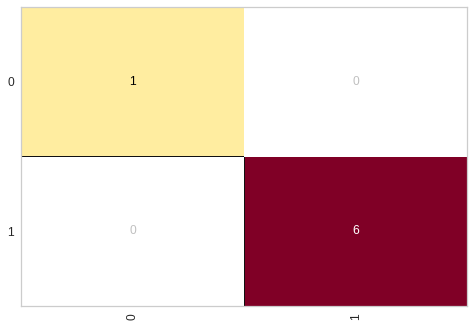

In [31]:
cm = ConfusionMatrix(nb)
cm.fit(x_train, y_train)
cm.score(x_test,y_test)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
tree = DecisionTreeClassifier(criterion='entropy')

In [34]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
prev = tree.predict(x_test)
prev

array([1, 0, 1, 1, 0, 0, 1])

In [36]:
y_test

array([1, 1, 1, 1, 1, 0, 1])

In [37]:
accuracy_score(y_test, prev)

0.7142857142857143

0.7142857142857143

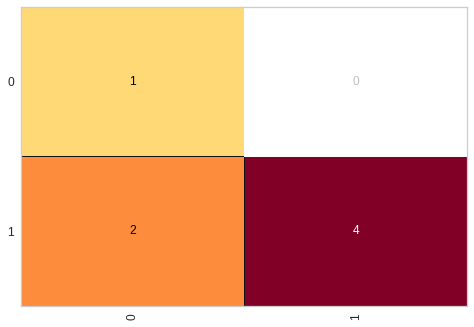

In [38]:
cm2 = ConfusionMatrix(tree)
cm2.fit(x_train, y_train)
cm2.score(x_test,y_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(n_estimators=50, criterion='entropy')

In [41]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [42]:
pred = rf.predict(x_test)
pred

array([1, 0, 1, 1, 0, 0, 1])

In [43]:
y_test

array([1, 1, 1, 1, 1, 0, 1])

In [45]:
accuracy_score(y_test,pred)

0.7142857142857143

0.7142857142857143

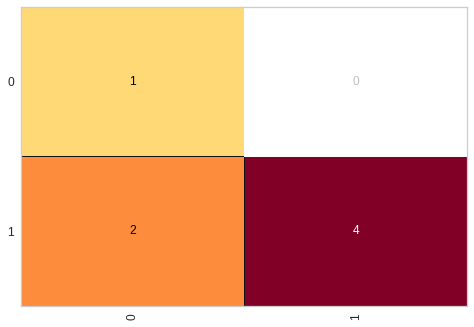

In [44]:
cm3 = ConfusionMatrix(rf)
cm3.fit(x_train, y_train)
cm3.score(x_test,y_test)

In [46]:
from sklearn.linear_model import LogisticRegression

In [48]:
reg = LogisticRegression()

In [49]:
reg.fit(x_train,y_train)

LogisticRegression()

In [50]:
previsoes = reg.predict(x_test)
previsoes

array([1, 1, 1, 1, 1, 0, 1])

In [51]:
y_test

array([1, 1, 1, 1, 1, 0, 1])

In [52]:
accuracy_score(y_test,previsoes)

1.0

1.0

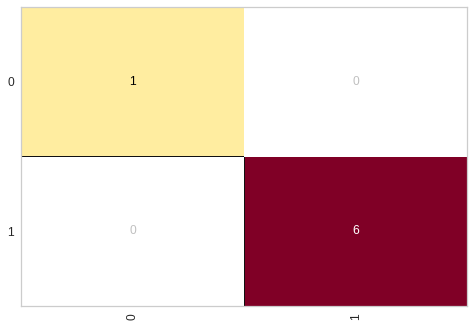

In [53]:
cm4 = ConfusionMatrix(reg)
cm4.fit(x_train, y_train)
cm4.score(x_test,y_test)

In [56]:
from sklearn.svm import SVC

In [57]:
svm = SVC()

In [58]:
svm.fit(x_train, y_train)

SVC()

In [59]:
forecast = svm.predict(x_test)

In [60]:
forecast

array([1, 1, 1, 1, 1, 0, 1])

In [61]:
y_test

array([1, 1, 1, 1, 1, 0, 1])

In [62]:
accuracy_score(y_test,forecast)

1.0

1.0

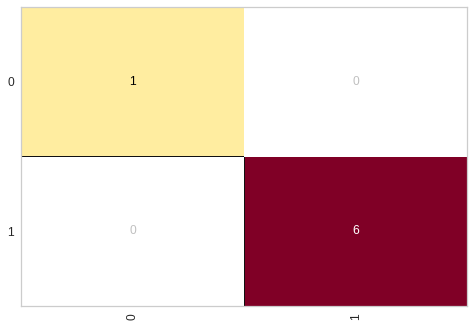

In [63]:
cm5 = ConfusionMatrix(svm)
cm5.fit(x_train, y_train)
cm5.score(x_test,y_test)

Usamos 5 métodos diferentes, Decision Tree e Random Forest apresentaram acurácia aceitavel apenas, pois são metodos que precisam de maior coleta de dados já que formam as arvores, é um dataset pequeno

já outros metodos, como Regressao Logistica, SVM, Naives Bayes apresetaram 100% de acurácia

**Algoritimos para Regressão**

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
arvore = DecisionTreeRegressor(criterion='mse')

In [68]:
arvore.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse')

In [69]:
forecast_ = arvore.predict(x_test)

In [70]:
forecast_

array([1. , 0. , 1. , 1. , 0.5, 0. , 1. ])

In [71]:
y_test

array([1, 1, 1, 1, 1, 0, 1])

In [72]:
arvore.score(x_train,y_train)

0.7916666666666667

fazendo previsões

In [74]:
arvore.predict(np.array([[26]]))

array([0.])

In [75]:
arvore.predict(np.array([[54]]))

array([1.])

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
rl = LinearRegression()

In [78]:
rl.fit(x_train,y_train)

LinearRegression()

In [79]:
previsao_ = rl.predict(x_test)

In [80]:
previsao_

array([0.60629429, 0.66756982, 0.64714464, 0.83097124, 0.79012088,
       0.21821592, 0.56544393])

In [81]:
y_test

array([1, 1, 1, 1, 1, 0, 1])

In [82]:
rl.score(x_train,y_train)

0.45871543698763384

In [83]:
rl.score(x_test,y_test)

0.1843856177510862

In [86]:
#fazendo previsoes

In [84]:
rl.predict(np.array([[54]]))

array([0.74927053])

In [85]:
rl.predict(np.array([[18]]))

array([0.01396415])

obtivemos um melhor resultado para a regressão com o algoritimo de Decision Tree, fazendo previsões melhores e mais perto do esperado